<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مبانی بینایی 3 بعدی (پاییز 1402)
        </font>
		<p></p>
        <h1 style="text-align: center">
        تمرین اول - بخش عملی
        </h1>
		<h2 style="text-align: center">
        نام و نام خانوادگی: محمدجواد ماهرالنقش
		<br>
		شماره دانشجویی: 99105691
		<br>
		</h2>		 
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 1
        </font>
		<p></p>
		<hr>
       الف- ماتریس زیر را در نظر بگیرید، با استفاده از کتابخانه‌های موجود یک 2D DFT بر روی آن اعمال کنید و به فضای فرکانس ببرید و نتیجه را چاپ نمایید.
	   <br>
	</font>
</div>

In [1]:
import numpy as np

matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])


# source: https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html#numpy.fft.fft2
dft_matrix = np.fft.fft2(matrix)
print("Original Matrix:\n", matrix)
print("\nDiscrete Fourier Transform:\n", dft_matrix)

Original Matrix:
 [[ 3  4 -3  1  2]
 [ 6  5 -4  8 -6]
 [-7  1  5  7  9]
 [-9 -2  5  6  3]
 [ 9  6  8 -2  5]]

Discrete Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 [  3.2532889  +9.11453775j  40.08610463-11.63719218j
  -10.        -14.49036173j  40.02379874 +8.75126649j
   29.53444185+16.6497449j ]
 [-15.7532889 +21.40502748j -12.52379874+19.86618572j
  -32.58610463 -4.56352474j   0.46555815-12.05346401j
  -10.         -6.3268805j ]
 [-15.7532889 -21.40502748j -10.         +6.3268805j
    0.46555815+12.05346401j -32.58610463 +4.56352474j
  -12.52379874-19.86618572j]
 [  3.2532889  -9.11453775j  29.53444185-16.6497449j
   40.02379874 -8.75126649j -10.        +14.49036173j
   40.08610463+11.63719218j]]


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
       ب- بدون استفاده از کتابخانه‌های آماده خودتان تابع تبدیل فوریه را بنویسید و تصویر 1.jpg را به فضای فوریه ببرید و نتیجه را چاپ کنید.
</font> 
</div>

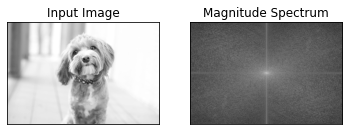

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread(r'1.jpg', 0)

# source: https://stackoverflow.com/questions/66003956/magnitude-of-complex-numbers-in-array
def ready_fft():
    magnitude_spectrum = np.fft.fft2(img)
    magnitude_spectrum = np.fft.fftshift(magnitude_spectrum)
    magnitude_spectrum = np.abs(magnitude_spectrum)
    magnitude_spectrum = np.log1p(magnitude_spectrum)
    return magnitude_spectrum


def FFT1(x):
    range_ = x.shape[0]
    return np.array([np.sum(x * np.exp(-2j * np.pi * counter * np.arange(range_) / range_)) / range_ for counter in range(range_)])

    # The following takes a lot of time to run
    # N = len(x)
    # X = np.zeros(N, dtype=complex)
    # for k in range(N):
    #     for n in range(N):
    #         X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    #     X[k] /= np.sqrt(N)
    # return X



def FFT2(x):
    # print(x.shape)
    X = np.array([FFT1(row) for row in x])
    X = np.array([FFT1(col) for col in X.T]).T
    return X


# It is my implemented FFT 2D (takes about 1-2 minutes to run)
# If you want to use pre-implemented one, use ready_fft() function instead
magnitude_spectrum = FFT2(img)
magnitude_spectrum = np.fft.fftshift(magnitude_spectrum)
magnitude_spectrum = np.abs(magnitude_spectrum)
magnitude_spectrum = np.log(magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum , cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 2
        </font>
		<p></p>
		<hr>
       فیلترهای فضایی Smooth کردن تصویر شامل Gaussian Blur, Average Pooling و Low pass filter را خودتان پیاده سازی کرده و بر روی تصویر 2.png اعمال کنید.
	   <br>
	</font>
</div>

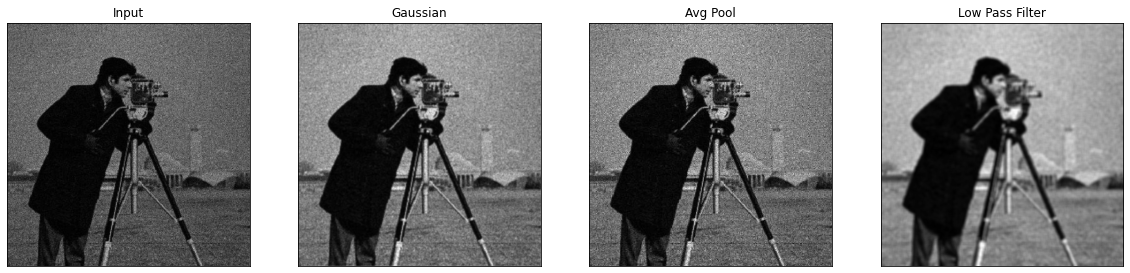

In [89]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

##################################
# Gaussian Blur 
# src: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
from scipy.signal import convolve2d
def gaussian_blur_own(image, sigma):
    filter_size = int(6 * sigma)
    if filter_size % 2 == 0:
        filter_size += 1

    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                     np.exp(-((x - (filter_size - 1) / 2) ** 2 + (y - (filter_size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (filter_size, filter_size)
    )
    kernel /= np.sum(kernel)
    blurred_image = convolve2d(image, kernel, mode='same', boundary='wrap')

    return blurred_image

##################################
# Average Pooling

# src: https://stackoverflow.com/questions/42463172/how-to-perform-max-mean-pooling-on-a-2d-array-using-numpy
def average_pooling(image, pool_size):
    height, width = image.shape
    pool_height, pool_width = pool_size
    pooled_height = height // pool_height
    pooled_width = width // pool_width

    pooled_image = np.zeros((pooled_height, pooled_width))

    for i in range(pooled_height):
        for j in range(pooled_width):
            window = image[i * pool_height:(i + 1) * pool_height, j * pool_width:(j + 1) * pool_width]
            pooled_image[i, j] = np.mean(window)

    return pooled_image
##################################
## Low Pass Filter 
from scipy import ndimage # for convolution

def LPF(image, filter_size, cutoff):
    # source: https://www.w3resource.com/numpy/array-creation/fromfunction.php
    kernel = np.fromfunction(
        lambda x, y: 1 / (1 + (np.power((x - filter_size // 2), 2) + np.power((y - filter_size // 2), 2)) / (cutoff * cutoff)),
        (filter_size, filter_size)
    )
    kernel /= np.sum(kernel)
    # source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
    filtered_image = ndimage.convolve(image, kernel)
    return filtered_image


##################################

# src: https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/#gsc.tab=0
# ready
gaussian_img = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
# from scratch
gaussian_img = gaussian_blur_own(img, 1.0)

# src: https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
# ready
avg_pool_img = cv2.blur(img, (5, 5))
# from scratch
avg_pool_img = average_pooling(img, (2, 2))

# src: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html
# ready
filtered_image = cv2.filter2D(img,-1,(0.75, 0.75))
# from scratch
filtered_image = LPF(img, 9, 5.0)



plt.figure(figsize=(20, 5))  

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 3
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و تبدیل‌های HSV و YCbCr را بر روی تصاویر اعمال کرده و در خروجی نشان دهید.
	   <br>
	</font>
</div>

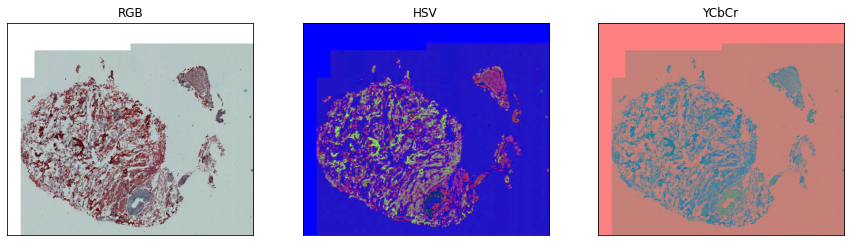

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('3.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

plt.figure(figsize=(15, 5))  

plt.subplot(131),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img, cmap = 'gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 4
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و پس از حذف نویزهای نمک و فلفلی از روی تصویر، بک‌گراند تصویر را حذف کنید. (دقت کنید که بک‌گراند شامل بخش‌های سفیدرنگ و بخش‌های کرمی‌رنگ می‌باشد.)
	   <br>
	</font>
</div>

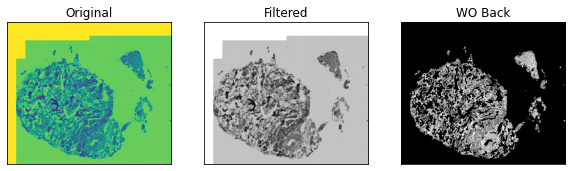

In [65]:
img = cv2.imread('3.jpg', 0)

filtered_image = cv2.medianBlur(img, 5)
# we can  also remove cv2.THRESH_BINARY
_, binary_mask = cv2.threshold(filtered_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

back = cv2.bitwise_not(binary_mask)
foreground = cv2.bitwise_and(filtered_image, filtered_image, mask=back)


plt.figure(figsize=(10, 5))


plt.subplot(131),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(filtered_image, cmap = 'gray')
plt.title('Filtered'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(foreground, cmap = 'gray')
plt.title('WO Back'), plt.xticks([]), plt.yticks([])
plt.show()